In [1]:
import cmath
import math
from matplotlib import pyplot as plt

# Диаметры, ограничивающие перемещение центра масс
D_mass_center_max = 13
D_mass_center_min = 5.8

angular_delta = 15
angle = 90

def real_to_math_yaw(yaw):
    """returns yaw in Degrees"""
    math_yaw = -1 # 360 - yaw
    yaw %= 360
    
    if yaw >= 0 and yaw <= 90:
        math_yaw = 90 - yaw
    elif yaw > 90 and yaw < 180:
        delta = yaw - 90
        math_yaw = 360 - delta
    elif yaw >= 180 and yaw < 270:
        delta = yaw - 180
        math_yaw = 270 - delta
    else:
        delta = yaw - 270
        math_yaw = 180 - delta
        
    return math_yaw


def real_to_math_yaw_2(yaw):
    yaw %= 360
    return (360 + 90 - yaw) % 360


"Test it!"
#for i in range(361):
#    print("{:2d}:   {:3d}  {:3d} ".format(i, real_to_math_yaw(i), real_to_math_yaw_2(i)))
    

'Test it!'

In [2]:
def math_to_real_yaw_2(m_yaw):
    m_yaw %= 360
    return (360 + 90 - m_yaw) % 360

#print("Math angle", "", "Real Yaw")
#for i in range(461):
#    print("{:2d}:        {:3d}".format(i, math_to_real_yaw_2(i)))

In [3]:
x_outer = [] # Z AUV
y_outer = [] # X AUV

x_inner = []
y_inner = []

N = 360 // angular_delta

for i in range(N):
    # в полярных координатах
    p1 = cmath.rect(D_mass_center_max, math.radians(angle))
    p2 = cmath.rect(D_mass_center_min, math.radians(angle + angular_delta/2))
    
    x_outer.append(p1.real)
    y_outer.append(p1.imag)
    
    x_inner.append(p2.real)
    y_inner.append(p2.imag)
    
    #print(i, round(x_outer[i], 2), round(y_outer[i], 2), round((angle % 360) , 3), sep='\t')
    
    angle += angular_delta
    
print(len(x_outer), len(y_outer))

24 24


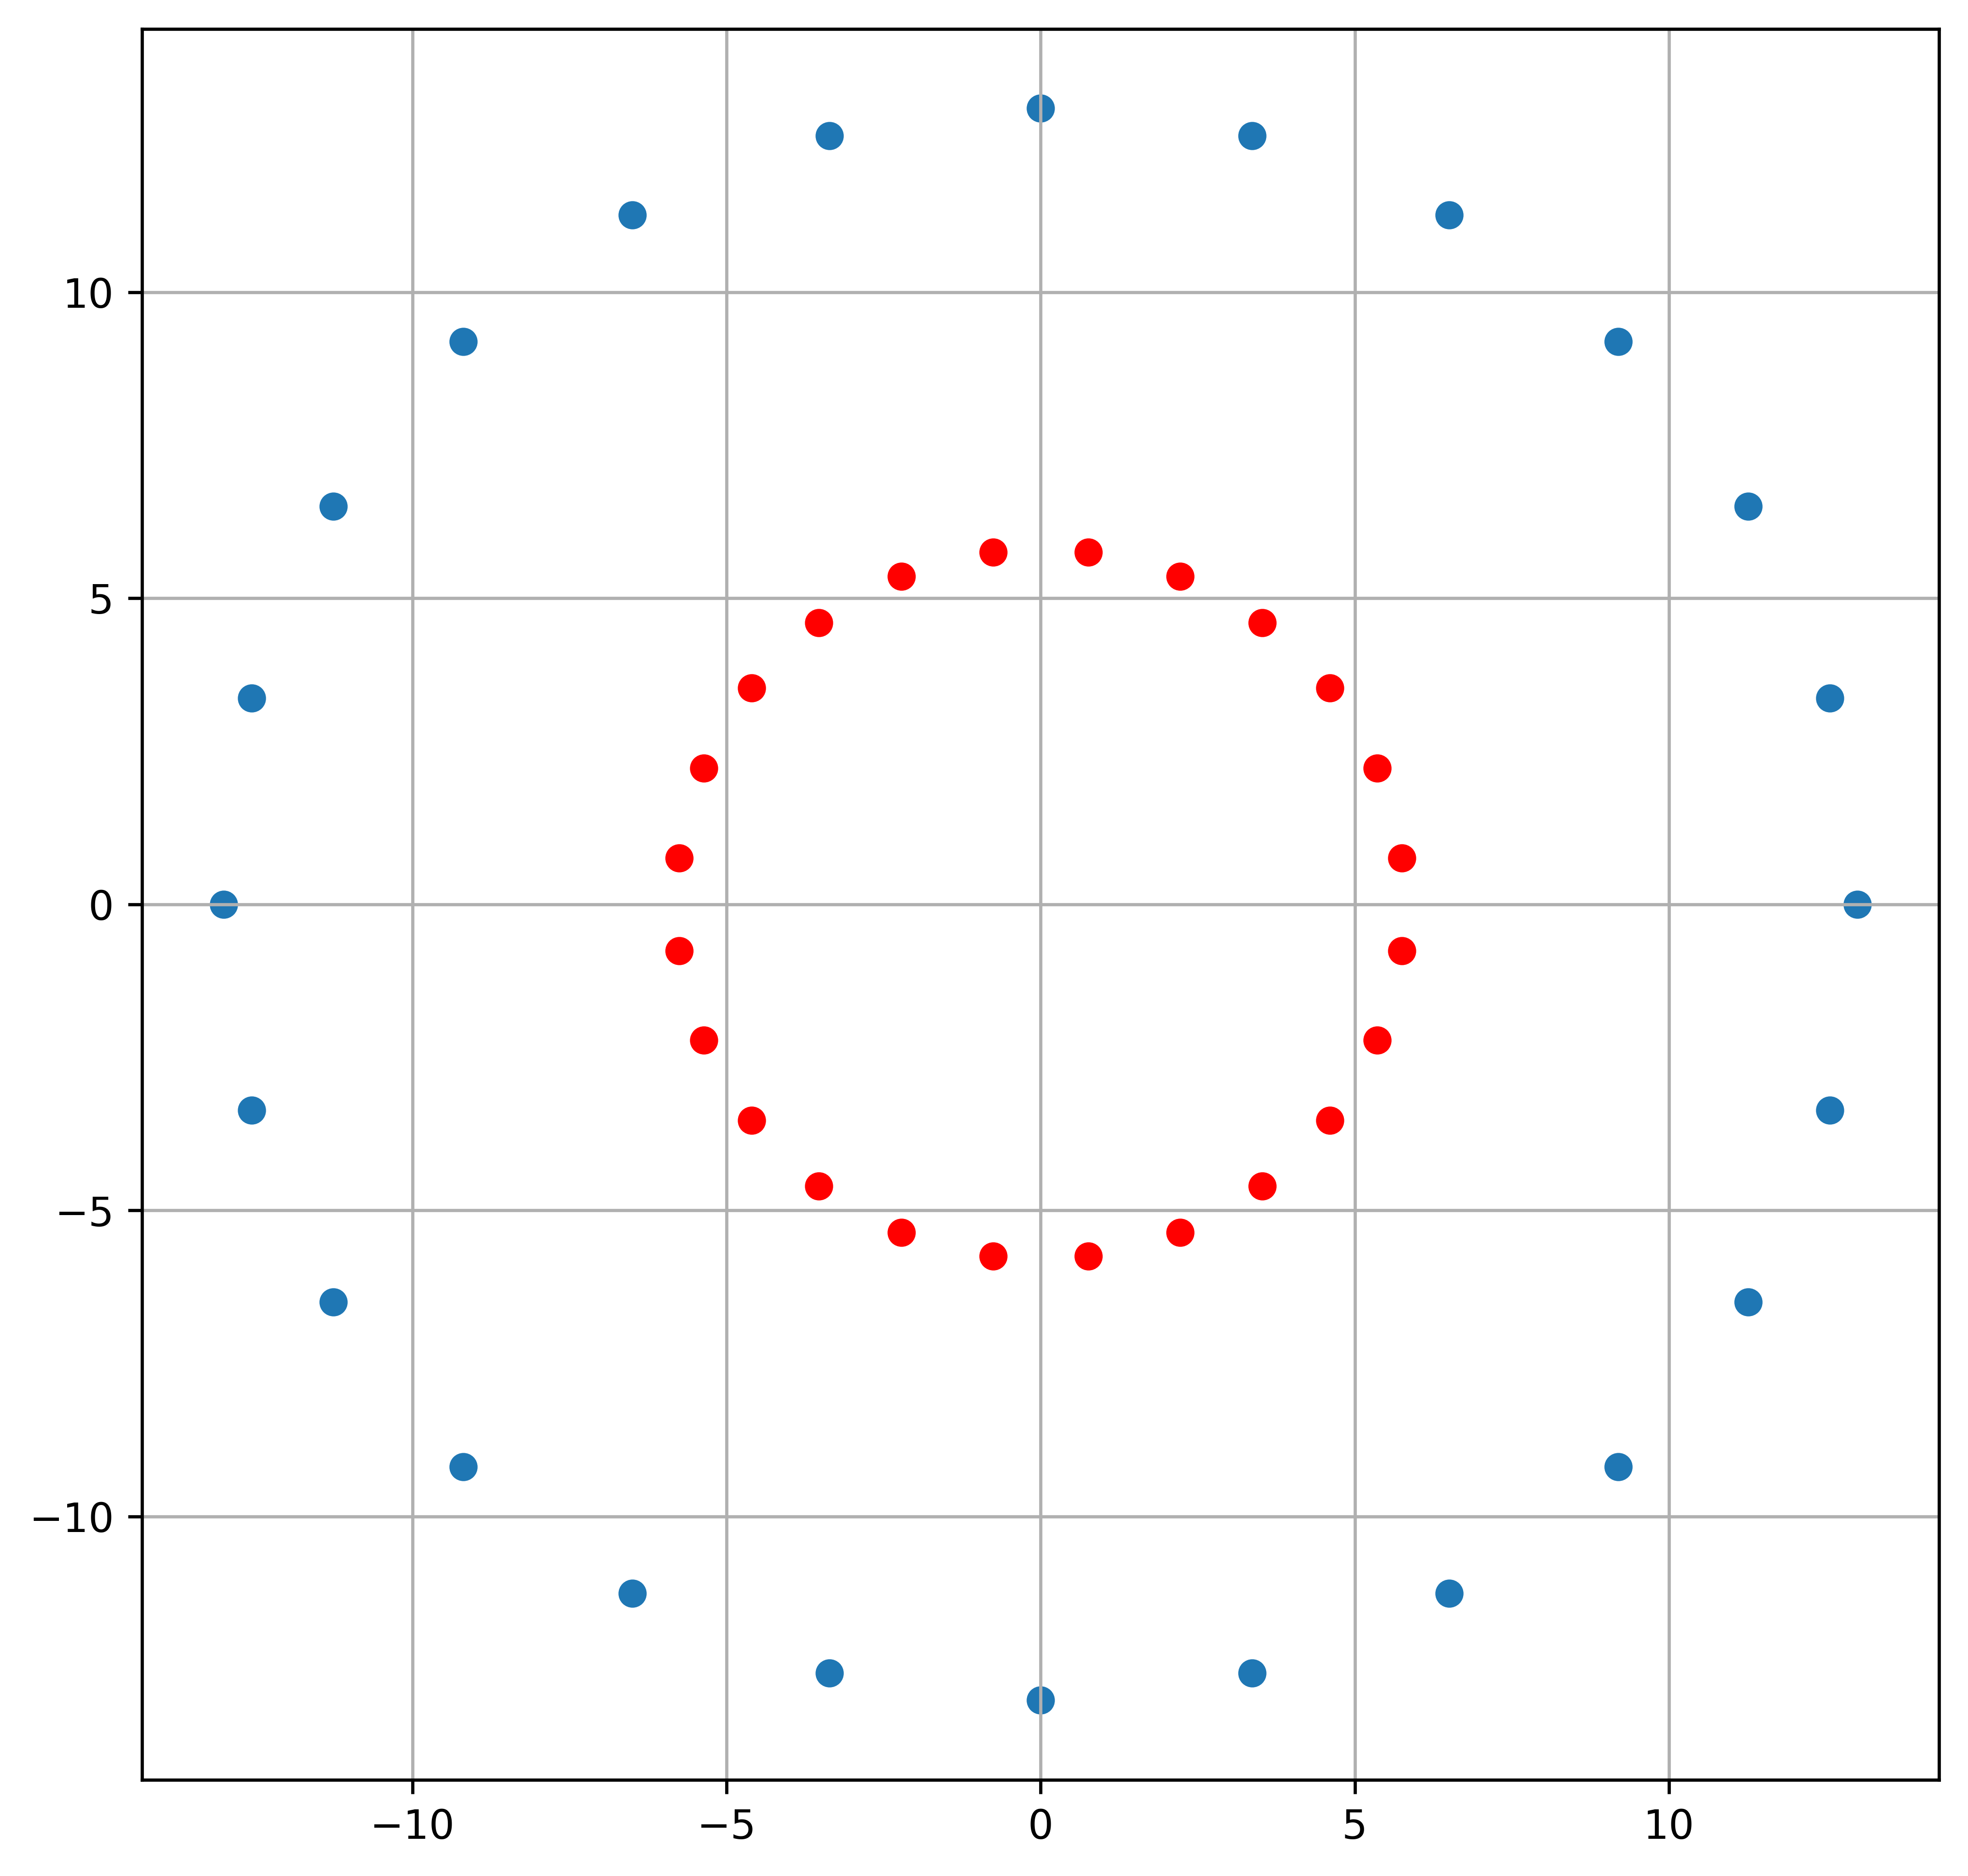

In [4]:
plt.figure(figsize=(8, 8), dpi=600)
plt.scatter(x_outer, y_outer)
plt.scatter(x_inner, y_inner, color='r')
plt.grid()

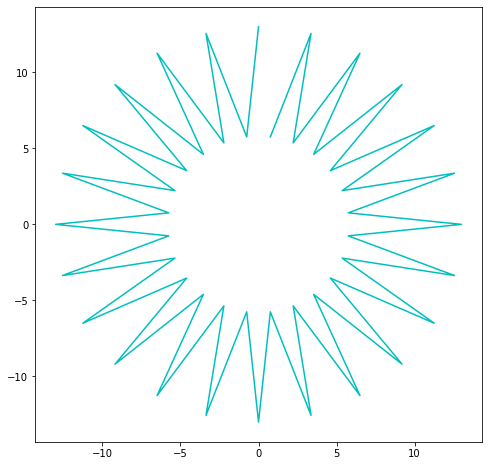

In [5]:
x_final = []
y_final = []
direction = []

for i in range(len(x_outer)):
    x_final.append(x_outer[i])
    x_final.append(x_inner[i])
    direction.append("foreward")
    
    y_final.append(y_outer[i])
    y_final.append(y_inner[i])
    direction.append("backward")


from pprint import pprint
#for elem in zip(x_final, y_final, direction):
#    print(round(elem[0], 2), round(elem[1], 2), elem[2][0] , sep='\t')

plt.figure(figsize=(8, 8))
plt.plot(x_final, y_final, color='c')

### Подберём кривую для последней части стыковки

В предположении, что стыковочный узел находится условно справа
- k = 0.01 ... 0 для верхней полуплоскости и
- k = - 0.01 ... 0 для нижней
\begin{align}
y = k \cdot (x - 1)^2
\end{align}

\begin{align}
y =  - \sqrt {\pm \frac xk} - 1
\end{align}

Порядок действий:

1. Находим k как

\begin{align}
k =  \frac{y+1}  {(x-1)^2}
\end{align}

2. Строим точки
3. Движемся по ним

In [6]:
def f1(_x):
    return -(-50 * _x) ** 0.5

def f2(_x):
    return -(50 * _x) ** 0.5


#######################

def f3(_x, k, n = 2):
    return k * (_x - 1)**n

def f4(_x, k):
    if _x < 0:
        return -(-_x / k ) ** 0.5 - 1
    else:
        return -(_x / k ) ** 0.5 - 1


def draw_circles(a3):
    circle1 = plt.Circle((0, 0), 5.8, color='b', fill=False)
    circle2 = plt.Circle((0, 0), 13, color='b', fill=False)
    a3.add_artist(circle1)
    a3.add_artist(circle2)
    return


def draw_tolerances(a3):
    """Рисуем допуски по углу входа"""
    tolerance = 10 # degrees

    a3.plot([1, 15], [0, 14*np.sin(np.deg2rad(tolerance))], color='red')
    a3.plot([1, 15], [0, -14*np.sin(np.deg2rad(tolerance))], color='red')
    return
 

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


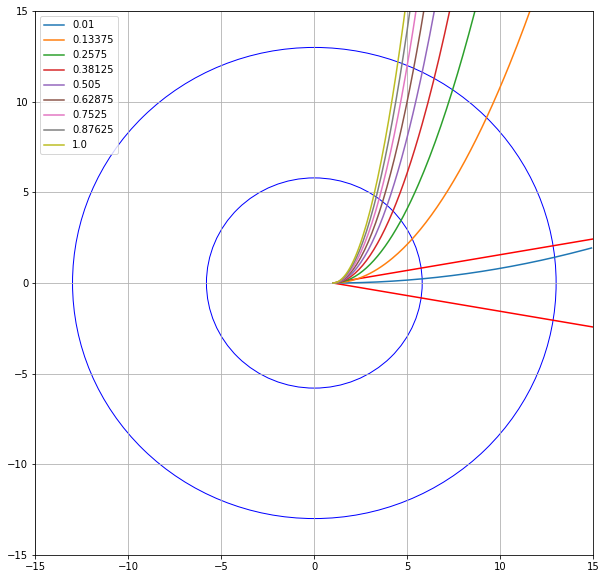

In [42]:
from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 54em; }</style>"))

import numpy as np

plt.figure(figsize=(10, 10))
plt.xlim(-15, 15)
plt.ylim(-15, 15)
a2 = plt.subplot()

draw_circles(a2)
draw_tolerances(a2)

x = np.arange(1, 15, 0.1)

for k in np.linspace(0.01, 1, 9):
    y = [f3(_x, k) for _x in x]
    a2.plot(x, y, label=str(k))

a2.grid()
a2.legend()

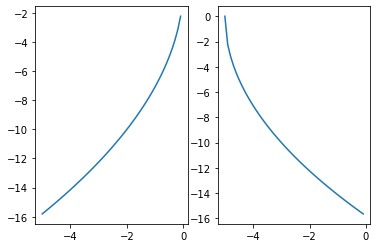

In [8]:
import numpy as np

x1 = np.arange(-5, 0, 0.1)
y1 = [f1(_x) for _x in x1]

x2 = np.arange(0, 5, 0.1)
y2 = [f2(_x) for _x in x2]

fig, axes = plt.subplots(1, 2)

axes[0].plot(x1, y1)
axes[1].plot(x1, y2)

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


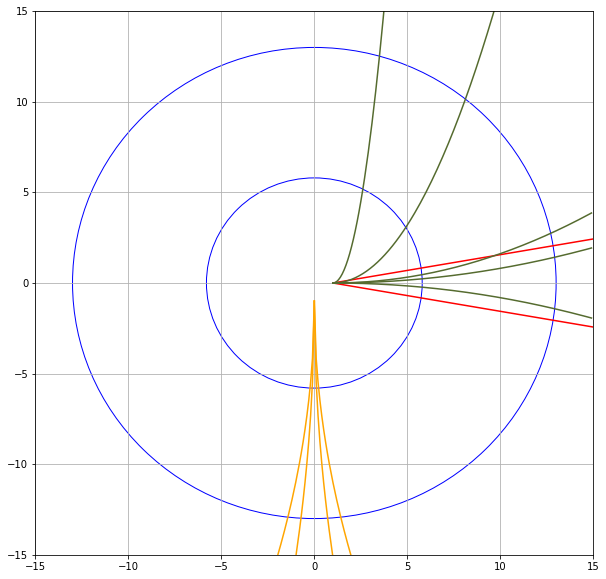

In [34]:
#f1 = plt.figure(figsize=(10,10))
#ax1 = f1.add_sub
plt.figure(figsize=(10, 10))
plt.xlim(-15, 15)
plt.ylim(-15, 15)
a3 = plt.subplot()

draw_circles(a3)
draw_tolerances(a3)

k = [2, 0.2, 0.02, 0.01, -0.01]
for coeff in k:
    
    x3 = np.arange(1, 15, 0.1)
    y3 = [f3(_x, coeff) for _x in x3]
    a3.plot(x3, y3, color = 'darkolivegreen')


# низ
k = [0.01, 0.005]
for coeff in k:        

    x4 = np.arange(-15, 0.1, 0.1)
    y4 = [f4(_x, coeff) for _x in x4]
    a3.plot(x4, y4, color='orange')
    
for coeff in k:        

    x5 = np.arange(0, 15, 0.1)
    y5 = [f4(_x, coeff) for _x in x5]
    a3.plot(x5, y5, color='orange')

a3.grid()

In [10]:
#plt.plot(x4, y4)
#print(len(x4), len(y4))
#print(y4[:10])
#f4(0, 0.01)
#print(len(x5), x5[:10])